# ANALIZA PODATKOV

In [90]:
import pandas as pd
import os
import numpy as nd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 20

glava = ['atomsko_st', 'simbol', 'ime', 'izvor_imena', 'skupina', 'perioda', 'blok', 'rel_at_masa', 'gostota', 'talisce', 'vrelisce', 'spec_toplota', 'el_neg', 'pogostost_v_zem_skorji', 'izvor', 'argegato']
data = pd.read_csv('elementi.csv')
data

,atomsko_st,simbol,ime,izvor_imena,skupina,perioda,blok,rel_at_masa,gostota,talisce,vrelisce,spec_toplota,el_neg,pogostost_v_zem_skorji,izvor,argegato
0,1,H,Hydrogen,"Greek elements hydro- and -gen, 'water-forming'",1,1,s-block,1.0080,0.000090,14.01,20.28,14.304,2.20,1400,primordial,gas
1,2,He,Helium,"Greek hḗlios, 'sun'",18,1,s-block,4.0026,0.000179,NaN,4.22,5.193,NaN,0.008,primordial,gas
2,3,Li,Lithium,"Greek líthos, 'stone'",1,2,s-block,6.9400,0.534000,453.69,1560.00,3.582,0.98,20,primordial,solid
3,4,Be,Beryllium,"Beryl, a mineral (ultimately from the name of ...",2,2,s-block,9.0122,1.850000,1560.00,2742.00,1.825,1.57,2.8,primordial,solid
4,5,B,Boron,"Borax, a mineral (from Arabic bawraq, Middle P...",13,2,p-block,10.8100,2.340000,2349.00,4200.00,1.026,2.04,10,primordial,solid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Fl,Flerovium,"Joint Institute for Nuclear Research, part of ...",14,7,p-block,289.0000,11.400000,284.00,NaN,NaN,NaN,NaN,synthetic,unknown phase
114,115,Mc,Moscovium,"Moscow, Russia, where the element was first sy...",15,7,p-block,290.0000,13.500000,700.00,1400.00,NaN,NaN,NaN,synthetic,unknown phase
115,116,Lv,Livermorium,Lawrence Livermore National Laboratory in Live...,16,7,p-block,293.0000,12.900000,700.00,1100.00,NaN,NaN,NaN,synthetic,unknown phase
116,117,Ts,Tennessine,"Tennessee, United States, where Oak Ridge Nati...",17,7,p-block,294.0000,7.130000,700.00,883.00,NaN,NaN,NaN,synthetic,unknown phase


## 1. Povprečne, minimalne in maksimalne vrednosti

In [91]:
pocisceno = data[data[glava].notnull()]
print(pocisceno[glava[7:]].describe())

       rel_at_masa     gostota      talisce     vrelisce  spec_toplota  \
count   118.000000  118.000000   110.000000   106.000000     86.000000   
mean    146.488371    9.112281  1243.016587  2457.745094      0.629674   
std      89.686261    6.873986   884.094426  1605.182567      1.645245   
min       1.008000    0.000090    14.010000     4.220000      0.094000   
25%      66.465750    3.750500   510.560000  1055.000000      0.165750   
50%     142.575000    8.065000  1120.000000  2554.000000      0.243500   
75%     226.750000   12.440000  1801.250000  3556.500000      0.486500   
max     294.000000   27.000000  4000.000000  5869.000000     14.304000   

          el_neg  
count  99.000000  
mean    1.717677  
std     0.624679  
min     0.790000  
25%     1.245000  
50%     1.610000  
75%     2.130000  
max     3.980000  


## 2. Analiza po periodah in skupinah

### 2.1 Po periodah

In [92]:
data_period = data.groupby('perioda')

data_period.gostota.mean()

perioda
1     0.000134
2     0.874534
3     1.454123
4     5.392197
5     7.415994
6    10.673820
7    15.140937
Name: gostota, dtype: float64

<Axes: xlabel='gostota', ylabel='perioda'>

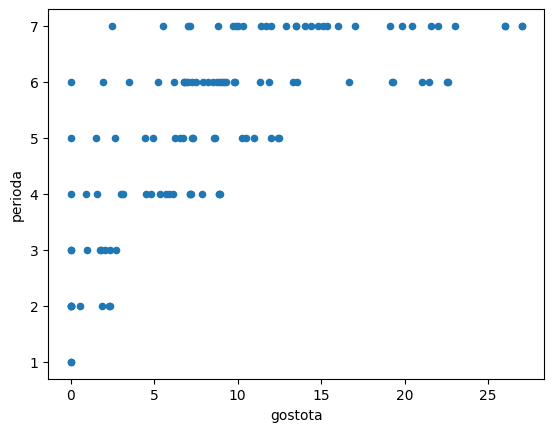

In [93]:
data.plot.scatter('gostota','perioda')

In [97]:
data_period.talisce.mean()

perioda
1      14.010000
2    1069.786250
3     609.425000
4    1215.838033
5    1387.565556
6    1522.220625
7    1108.472000
Name: talisce, dtype: float64

<Axes: xlabel='talisce', ylabel='perioda'>

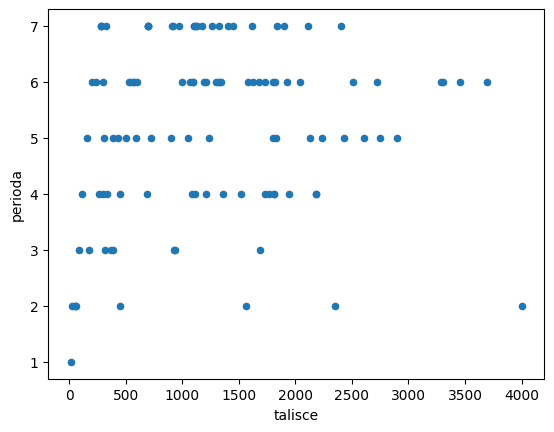

In [98]:
data.plot.scatter('talisce', 'perioda')

### 2.2 Po skupinah

In [ ]:
data_skupina = data.groupby('skupina')
data_skupina.gostota.mean()

skupina
1                  1.190584
10                17.095250
11                15.187500
12                10.831000
13                 7.685000
14                 6.654000
15                 6.254708
16                 5.869572
17                 4.015033
18                 1.003177
2                  2.798000
3                  7.924500
4                 10.334000
5                 13.242500
6                 14.920000
7                 16.307500
8                 17.478500
9                 17.717500
f-block groups    10.574357
Name: gostota, dtype: float64

<Axes: xlabel='gostota', ylabel='skupina'>

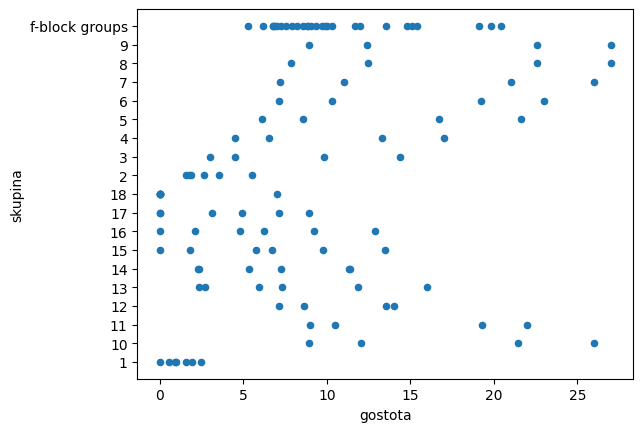

In [ ]:
data.sort_values(by = 'skupina', ascending=True).plot.scatter('gostota', 'skupina')

In [99]:
data_skupina.talisce.mean()

skupina
1                  295.735714
10                1865.816667
11                1310.010000
12                 451.132500
13                 882.022433
14                1381.348333
15                 603.155000
16                 474.230000
17                 358.796667
18                 152.091667
2                 1103.500000
3                 1859.500000
4                 2243.750000
5                 2741.000000
6                 2923.666667
7                 2469.333333
8                 2574.666667
9                 2241.333333
f-block groups    1369.135714
Name: talisce, dtype: float64